In [1]:
setwd("D:/Workspace/Rdata")

In [2]:
install.packages('foreign')

Warning message:
"package 'foreign' is not available (for R version 3.6.1)"

In [3]:
library(foreign) # spss 파일로드

In [4]:
library(dplyr) # 전처리


Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



In [5]:
library(ggplot2)  # 시각화

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


In [31]:
library(readxl) # 엑셀 파일 불러오기

In [32]:
raw_welfare = read.spss ( file = "Koweps_hpc10_2015_beta1.sav",
                          to.data.frame = T)

Warning message in read.spss(file = "Koweps_hpc10_2015_beta1.sav", to.data.frame = T):
"Koweps_hpc10_2015_beta1.sav: Compression bias (0) is not the usual value of 100"

In [33]:
welfare = raw_welfare

In [34]:
head(welfare)

h10_id,h10_ind,h10_sn,h10_merkey,h_new,h10_cobf,h10_reg5,h10_reg7,h10_din,h10_cin,...,c1007_4aq19,c1007_4aq20,c1007_4aq21,c1007_4aq22,c1007_4aq23,h10_pers_income1,h10_pers_income2,h10_pers_income3,h10_pers_income4,h10_pers_income5
1,1,1,10101,0,NA,1,1,864,864,...,NA,NA,NA,NA,NA,NA,NA,NA,0,NA
2,1,1,20101,0,NA,1,1,600,600,...,NA,NA,NA,NA,NA,NA,NA,NA,0,NA
3,1,1,30101,0,NA,1,1,1571,1619,...,NA,NA,NA,NA,NA,NA,1440,NA,0,NA
4,1,1,40101,0,NA,1,1,3579,3687,...,NA,NA,NA,NA,NA,NA,2400,NA,0,NA
4,1,1,40101,0,NA,1,1,3579,3687,...,NA,NA,NA,NA,NA,NA,NA,NA,0,NA
6,1,1,60101,0,NA,1,1,3030,3486,...,NA,NA,NA,NA,NA,NA,NA,3000,0,NA


In [35]:
tail(welfare)

,h10_id,h10_ind,h10_sn,h10_merkey,h_new,h10_cobf,h10_reg5,h10_reg7,h10_din,h10_cin,...,c1007_4aq19,c1007_4aq20,c1007_4aq21,c1007_4aq22,c1007_4aq23,h10_pers_income1,h10_pers_income2,h10_pers_income3,h10_pers_income4,h10_pers_income5
16659,9800,7,1,98000701,1,NA,4,5,9764,11600,...,NA,NA,NA,NA,NA,NA,NA,7163,0,NA
16660,9800,7,1,98000701,1,NA,4,5,9764,11600,...,NA,NA,NA,NA,NA,NA,NA,NA,0,NA
16661,9800,7,1,98000701,1,NA,4,5,9764,11600,...,NA,NA,NA,NA,NA,3630,NA,NA,0,NA
16662,9800,7,1,98000701,1,NA,4,5,9764,11600,...,NA,NA,NA,NA,NA,NA,700,NA,0,NA
16663,9800,7,1,98000701,1,NA,4,5,9764,11600,...,NA,NA,NA,NA,NA,NA,NA,NA,0,NA
16664,9800,7,1,98000701,1,NA,4,5,9764,11600,...,NA,NA,NA,NA,NA,NA,NA,NA,0,NA


In [36]:
View(welfare)

ERROR: Error in View(welfare): 'View()' not yet supported in the Jupyter R kernel


In [37]:
dim(welfare)

[1] 16664   957

In [38]:
summary(welfare)

     h10_id        h10_ind           h10_sn        h10_merkey      
 Min.   :   1   Min.   : 1.000   Min.   :1.000   Min.   :   10101  
 1st Qu.:2361   1st Qu.: 1.000   1st Qu.:1.000   1st Qu.:23612601  
 Median :4503   Median : 1.000   Median :1.000   Median :45030401  
 Mean   :4669   Mean   : 2.612   Mean   :1.003   Mean   :46689252  
 3rd Qu.:6613   3rd Qu.: 5.000   3rd Qu.:1.000   3rd Qu.:66130501  
 Max.   :9800   Max.   :10.000   Max.   :9.000   Max.   :98000701  
                                                                   
     h_new           h10_cobf        h10_reg5        h10_reg7    
 Min.   :0.0000   Min.   :1.000   Min.   :1.000   Min.   :1.000  
 1st Qu.:0.0000   1st Qu.:1.000   1st Qu.:2.000   1st Qu.:2.000  
 Median :0.0000   Median :1.000   Median :3.000   Median :3.000  
 Mean   :0.2009   Mean   :2.213   Mean   :2.641   Mean   :3.705  
 3rd Qu.:0.0000   3rd Qu.:2.000   3rd Qu.:3.000   3rd Qu.:6.000  
 Max.   :1.0000   Max.   :7.000   Max.   :5.000   Max.   :7.

In [39]:
# 변수명 변경하기
welfare = rename(welfare,
                 sex = h10_g3     , # 성별
                 birth = h10_g4         , # 태어난 연도
                 marriage = h10_g10, # 혼인 상태
                 religion = h10_g11, # 종교
                 income = p1002_8aq1, # 월급
                 code_job = h10_eco9, # 직종 코드
                 code_region = h10_reg7) # 지역 코드

In [40]:
# 성별 변수 검토 및 전처리
class(welfare$sex)

[1] "numeric"

In [41]:
# 2. 전치리 / 이상치 확인
table(welfare$sex)


   1    2 
7578 9086 

In [42]:
# 이상치 결측 처리
welfare$sex = ifelse(welfare$sex == 9, NA, welfare$sex)

In [43]:
# 결측치 확인
table(is.na(welfare$sex))


FALSE 
16664 

In [44]:
# 성별 항목 이름 부여
welfare$sex = ifelse(welfare$sex == 1, "male","female")
table(welfare$sex)


female   male 
  9086   7578 

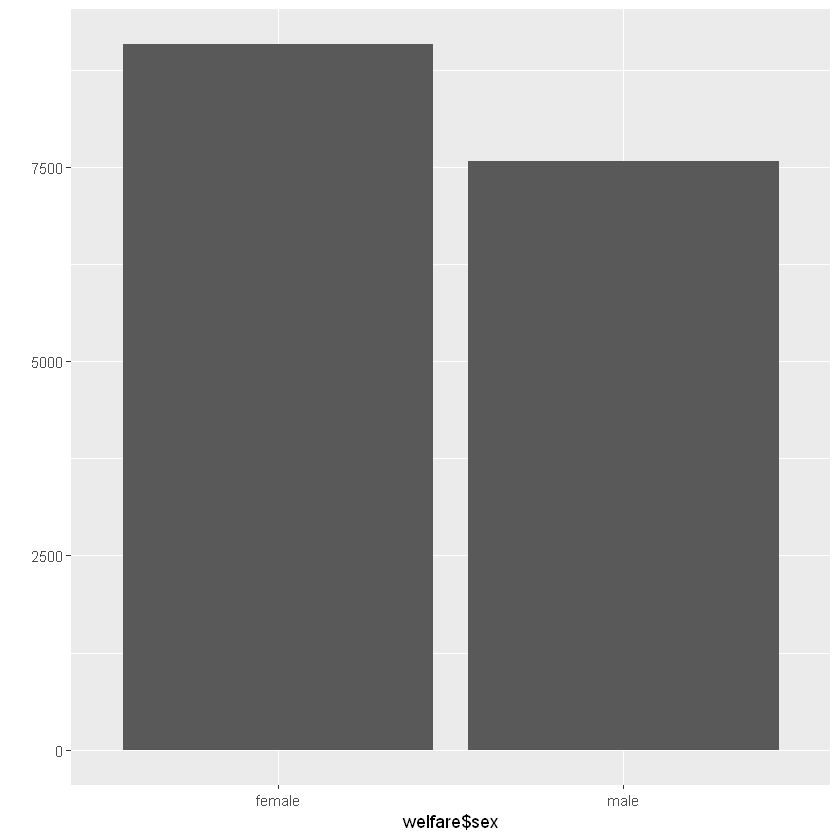

In [45]:
qplot(welfare$sex)

In [46]:
# 월급 변수 검토 및 전처리
# 1.변수 검토하기
class(welfare$income)

[1] "numeric"

In [47]:
summary(welfare$income)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
    0.0   122.0   192.5   241.6   316.6  2400.0   12030 

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
"Removed 12051 rows containing non-finite values (stat_bin)."Warning message:
"Removed 2 rows containing missing values (geom_bar)."

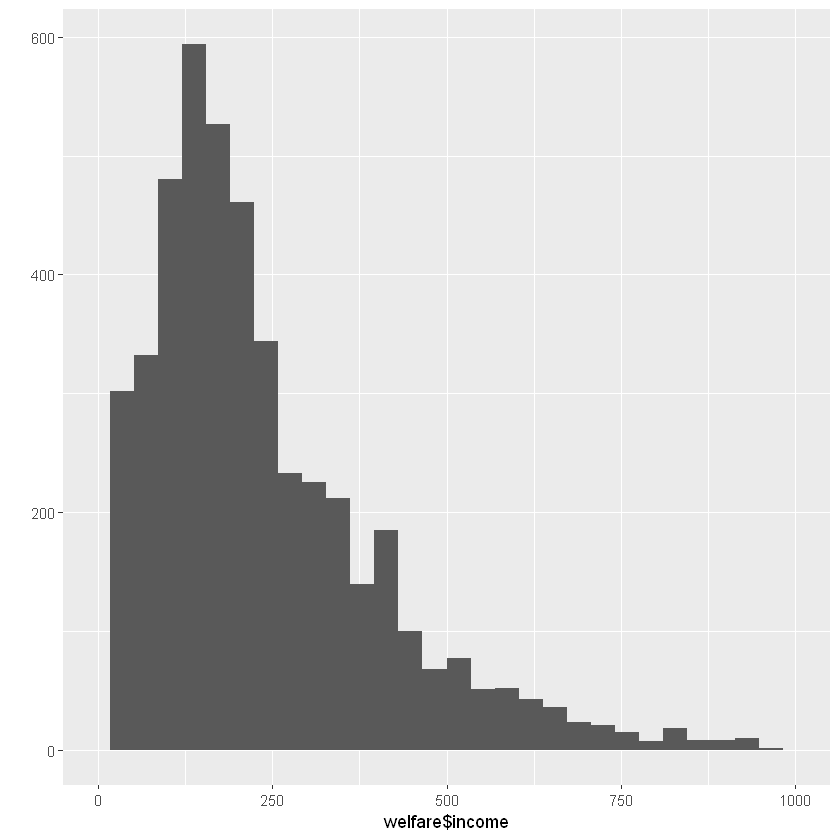

In [49]:
qplot(welfare$income) + xlim(0,1000)

In [50]:
# 2. 전처리
# 이상치 확인
summary(welfare$income)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
    0.0   122.0   192.5   241.6   316.6  2400.0   12030 

In [54]:
# 이상치 결측 처리
welfare$income = ifelse(welfare$income %in% c(0,9999), NA, welfare$income)

In [55]:
# 결측치 확인
table(is.na(welfare$income))


FALSE  TRUE 
 4620 12044 

In [57]:
# 성별에 따른 월급 차이 분석하기
# 1.성별 월급 평균표 만들기
sex_income = welfare %>% 
    filter(!is.na(income)) %>% 
    group_by(sex) %>% 
    summarise(mean_income = mean(income))
sex_income

sex,mean_income
female,163.2471
male,312.2932


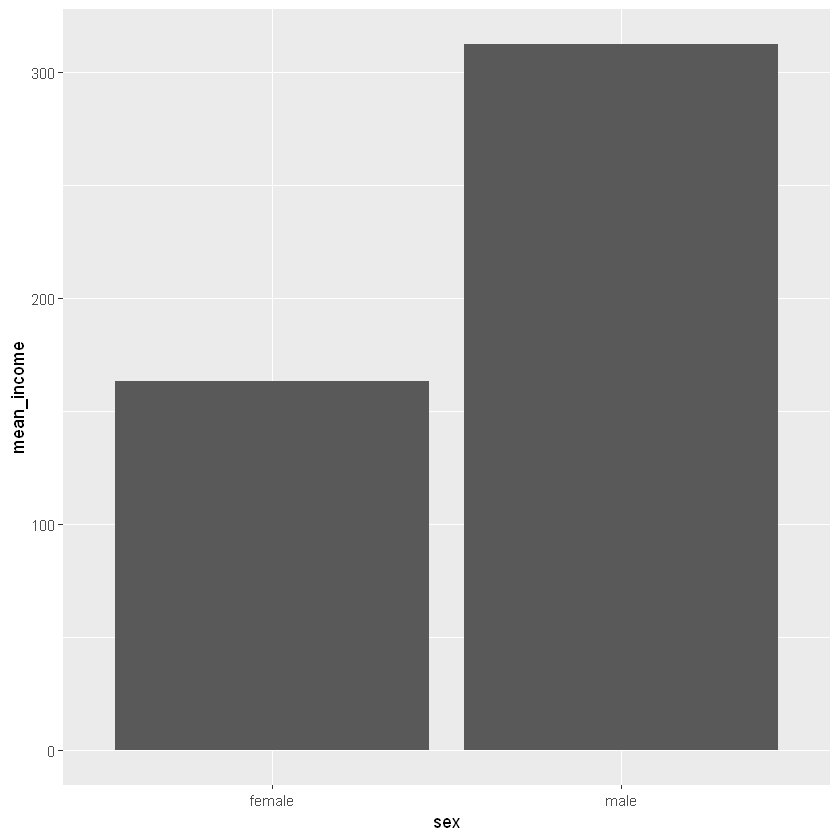

In [59]:
# 그래프 만들기
ggplot(data = sex_income, aes(x=sex, y=mean_income)) +geom_col()